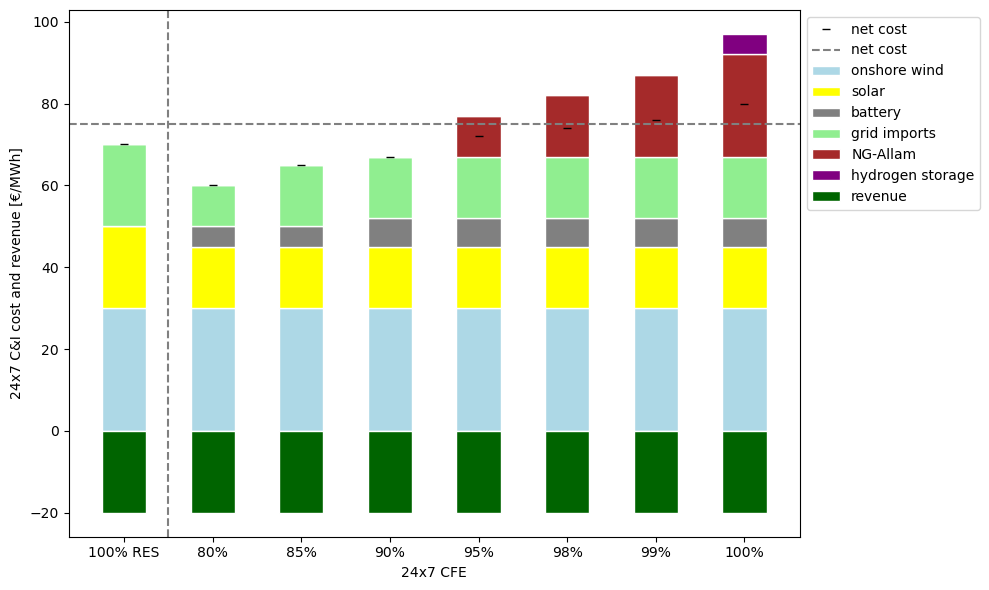

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['100% RES', '80%', '85%', '90%', '95%', '98%', '99%', '100%']
net_cost = [70, 60, 65, 67, 72, 74, 76, 80]
solar = [20, 15, 15, 15, 15, 15, 15, 15]
battery = [0, 5, 5, 7, 7, 7, 7, 7]
hydrogen_storage = [0, 0, 0, 0, 0, 0, 0, 5]
onshore_wind = [30, 30, 30, 30, 30, 30, 30, 30]
ng_allam = [0, 0, 0, 0, 10, 15, 20, 25]
grid_imports = [20, 10, 15, 15, 15, 15, 15, 15]
revenue = [-20, -20, -20, -20, -20, -20, -20, -20]

barWidth = 0.5

# Create bars
r = np.arange(len(categories))

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r, onshore_wind, color='lightblue', edgecolor='white', width=barWidth, label='onshore wind')
plt.bar(r, solar, bottom=np.array(onshore_wind), color='yellow', edgecolor='white', width=barWidth, label='solar')
plt.bar(r, battery, bottom=np.array(onshore_wind)+np.array(solar), color='grey', edgecolor='white', width=barWidth, label='battery')
plt.bar(r, grid_imports, bottom=np.array(onshore_wind)+np.array(solar)+np.array(battery), color='lightgreen', edgecolor='white', width=barWidth, label='grid imports')
plt.bar(r, ng_allam, bottom=np.array(onshore_wind)+np.array(solar)+np.array(battery)+np.array(grid_imports), color='brown', edgecolor='white', width=barWidth, label='NG-Allam')
plt.bar(r, hydrogen_storage, bottom=np.array(onshore_wind)+np.array(solar)+np.array(battery)+np.array(grid_imports)+np.array(ng_allam), color='purple', edgecolor='white', width=barWidth, label='hydrogen storage')

# Revenue bar
plt.bar(r, revenue, color='darkgreen', edgecolor='white', width=barWidth, label='revenue')

# Net cost line
plt.plot(r, net_cost, color='black', marker='_', linestyle='None', label='net cost')


plt.axhline(y=75, color='grey', linestyle='--', label='net cost')
plt.axvline(x=0.5, color='grey', linestyle='--')

# Custom X axis
plt.xticks(r, categories)
plt.xlabel("24x7 CFE")

# Custom Y axis
plt.ylabel("24x7 C&I cost and revenue [€/MWh]")

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show the plot
plt.tight_layout()
plt.show()



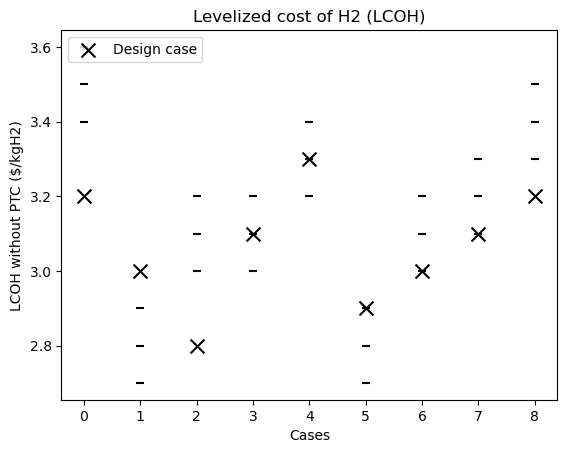

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
design_cases = [3.2, 3.0, 2.8, 3.1, 3.3, 2.9, 3.0, 3.1, 3.2]
out_of_sample_cases = [
    [3.5, 3.6, 3.4],
    [2.9, 2.8, 2.7],
    [3.1, 3.0, 3.2],
    [3.2, 3.1, 3.0],
    [3.3, 3.4, 3.2],
    [2.8, 2.9, 2.7],
    [3.0, 3.1, 3.2],
    [3.2, 3.3, 3.1],
    [3.3, 3.4, 3.5]
]

x = np.arange(len(design_cases))

# Plot
fig, ax = plt.subplots()

# Design cases
ax.scatter(x, design_cases, s=100, marker='x', color='black', label='Design case')

# Out-of-sample cases
for i, out_cases in enumerate(out_of_sample_cases):
    ax.scatter([i] * len(out_cases), out_cases, marker='_', color='black')

# Labels and title
ax.set_xlabel('Cases')
ax.set_ylabel('LCOH without PTC ($/kgH2)')
ax.set_title('Levelized cost of H2 (LCOH)')
ax.legend(loc='upper left')

# Show plot
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
capacity_df = pd.read_csv('/Users/ruthvikmukkamala/PycharmProjects/Dolphyn.jl/Test_1_60_RPS_Annual/1_Rep_VRE_Scenarios_Annual_C0/Results/capacity.csv')
power_df = pd.read_csv('/Users/ruthvikmukkamala/PycharmProjects/Dolphyn.jl/Test_1_60_RPS_Annual/1_Rep_VRE_Scenarios_Annual_C0/Results/power.csv')

# Preprocess capacity data: Convert MW to GW
capacity_df.set_index('Resource', inplace=True)
capacity_df_gw = capacity_df.loc['EndCap'] / 1000

# Updated list of technologies based on available columns
technologies = [
    'biomass', 'conventional_hydroelectric', 'conventional_steam_coal',
    'natural_gas_fired_combined_cycle', 'natural_gas_fired_combustion_turbine',
    'natural_gas_steam_turbine', 'nuclear', 'onshore_wind_turbine',
    'solar_photovoltaic', 'Battery'
]

# Convert capacity to GW and extract relevant technologies
capacity_gw = capacity_df_gw[technologies]

# Preprocess generation data: Convert MWh to TWh
annual_generation_mwh = power_df.loc[power_df['Zone'] == 'AnnualSum', 'Total']
annual_generation_twh = annual_generation_mwh / 1e6

# Create plots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot absolute capacity (GW)
capacity_gw.plot(kind='bar', ax=axs[0])
axs[0].set_title('Installed Capacity by Technology (GW)')
axs[0].set_ylabel('Capacity (GW)')
axs[0].set_xlabel('Technology')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Plot annual generation (TWh)
annual_generation_twh.plot(kind='bar', ax=axs[1])
axs[1].set_title('Annual Generation (TWh)')
axs[1].set_ylabel('Generation (TWh)')
axs[1].set_xlabel('Technology')
axs[1].set_xticklabels(['Total'], rotation=0)

plt.tight_layout()
plt.show()

        

KeyError: 'Zone'

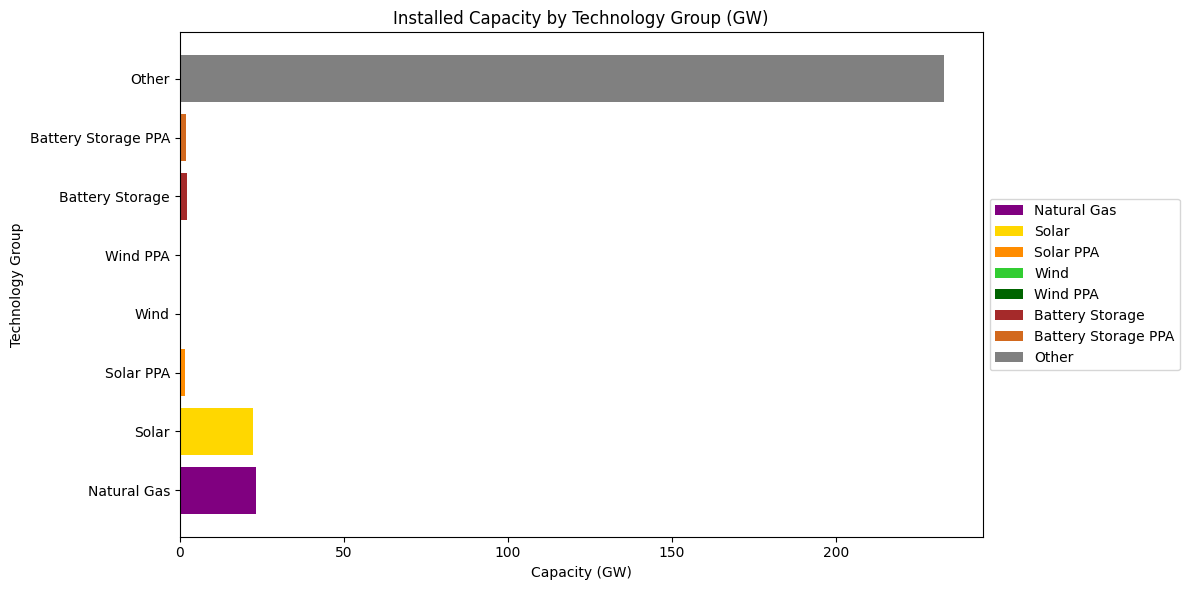

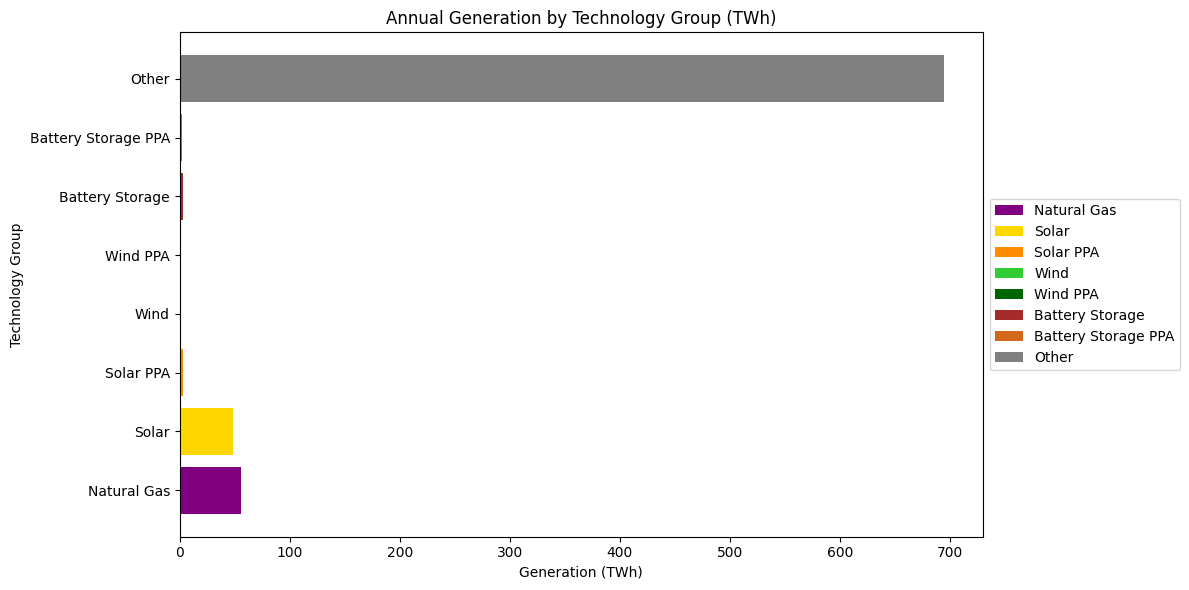

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the order for the technology groups
ordered_technologies = [
    'Natural Gas',
    'Solar',
    'Solar PPA',
    'Wind',
    'Wind PPA',
    'Battery Storage',
    'Battery Storage PPA',
    'Other'
]

# Define colors for each technology group to match the shared example

colors = {
    'Natural Gas': '#800080',   
    'Solar': '#FFD700',         
    'Solar PPA': '#FF8C00',     
    'Wind': '#32CD32',          
    'Wind PPA': '#006400',      
    'Battery Storage': '#A52A2A', 
    'Battery Storage PPA': '#D2691E', 
    'Other': '#808080'         
}

# Function to process capacity data
def process_capacity_data_corrected(capacity_df):
    capacity_gw_df = capacity_df.loc[capacity_df['Resource'] == 'EndCap'].copy()
    capacity_gw_df = capacity_gw_df.drop(columns=['Resource']).transpose().reset_index()
    capacity_gw_df.columns = ['Technology', 'Capacity_GW']
    capacity_gw_df['Capacity_GW'] /= 1000  
    
    tech_groups = {
        'Natural Gas': ['natural_gas_fired_combined_cycle', 'natural_gas_fired_combined_cycle_1',
                        'natural_gas_fired_combined_cycle_2', 'natural_gas_fired_combined_cycle_3',
                        'natural_gas_fired_combined_cycle_4', 'natural_gas_fired_combined_cycle_13',
                        'natural_gas_fired_combined_cycle_14', 'natural_gas_fired_combustion_turbine_3',
                        'natural_gas_fired_combustion_turbine_4'],
        'Solar': ['solar_photovoltaic', 'solar_photovoltaic_exp'],
        'Solar PPA': ['solar_photovoltaic_ppa'],
        'Wind': ['wind'],
        'Wind PPA': ['wind_ppa'],
        'Battery Storage': ['Battery', 'Battery_exp'],
        'Battery Storage PPA': ['Battery_ppa'],
        'Other': ['biomass', 'conventional_hydroelectric', 'conventional_steam_coal', 
                  'conventional_steam_coal_1']
    }
    
    capacity_gw_df['Group'] = 'Other'
    for group, techs in tech_groups.items():
        capacity_gw_df.loc[capacity_gw_df['Technology'].isin(techs), 'Group'] = group
    
    capacity_grouped_df = capacity_gw_df.groupby('Group')['Capacity_GW'].sum().reset_index()
    return capacity_grouped_df

# Function to process generation data
def process_generation_data_corrected(power_df):
    generation_twh_df = power_df.loc[power_df['Resource'] == 'AnnualSum'].copy()
    generation_twh_df.drop(columns=['Resource'], inplace=True)
    generation_twh_df = generation_twh_df.transpose().reset_index()
    generation_twh_df.columns = ['Technology', 'Generation_MWh']
    generation_twh_df['Generation_TWh'] = generation_twh_df['Generation_MWh'] / 1e6  
    
    tech_groups = {
        'Natural Gas': ['natural_gas_fired_combined_cycle', 'natural_gas_fired_combined_cycle_1',
                        'natural_gas_fired_combined_cycle_2', 'natural_gas_fired_combined_cycle_3',
                        'natural_gas_fired_combined_cycle_4', 'natural_gas_fired_combined_cycle_13',
                        'natural_gas_fired_combined_cycle_14', 'natural_gas_fired_combustion_turbine_3',
                        'natural_gas_fired_combustion_turbine_4'],
        'Solar': ['solar_photovoltaic', 'solar_photovoltaic_exp'],
        'Solar PPA': ['solar_photovoltaic_ppa'],
        'Wind': ['wind'],
        'Wind PPA': ['wind_ppa'],
        'Battery Storage': ['Battery', 'Battery_exp'],
        'Battery Storage PPA': ['Battery_ppa'],
        'Other': ['biomass', 'conventional_hydroelectric', 'conventional_steam_coal', 
                  'conventional_steam_coal_1']
    }
    
    generation_twh_df['Group'] = 'Other'
    for group, techs in tech_groups.items():
        generation_twh_df.loc[generation_twh_df['Technology'].isin(techs), 'Group'] = group
    
    generation_grouped_df = generation_twh_df.groupby('Group')['Generation_TWh'].sum().reset_index()
    return generation_grouped_df


capacity_df = pd.read_csv('/Users/ruthvikmukkamala/PycharmProjects/Dolphyn.jl/Test_1_60_RPS_Annual/1_Rep_VRE_Scenarios_Annual_C0/Results/capacity.csv')
power_df = pd.read_csv('/Users/ruthvikmukkamala/PycharmProjects/Dolphyn.jl/Test_1_60_RPS_Annual/1_Rep_VRE_Scenarios_Annual_C0/Results/power.csv')

# Process data
capacity_grouped_df_corrected = process_capacity_data_corrected(capacity_df)
generation_grouped_df_corrected = process_generation_data_corrected(power_df)

# Reorder data
capacity_grouped_df_ordered = capacity_grouped_df_corrected.set_index('Group').reindex(ordered_technologies).reset_index()
generation_grouped_df_ordered = generation_grouped_df_corrected.set_index('Group').reindex(ordered_technologies).reset_index()

# Create horizontal bar plot for power capacity
plt.figure(figsize=(12, 6))
for group in ordered_technologies:
    plt.barh(group, capacity_grouped_df_ordered.loc[capacity_grouped_df_ordered['Group'] == group, 'Capacity_GW'],
             color=colors[group], label=group)
plt.title('Installed Capacity by Technology Group (GW)')
plt.ylabel('Technology Group')
plt.xlabel('Capacity (GW)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Create horizontal bar plot for power generation
plt.figure(figsize=(12, 6))
for group in ordered_technologies:
    plt.barh(group, generation_grouped_df_ordered.loc[generation_grouped_df_ordered['Group'] == group, 'Generation_TWh'],
             color=colors[group], label=group)
plt.title('Annual Generation by Technology Group (TWh)')
plt.ylabel('Technology Group')
plt.xlabel('Generation (TWh)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


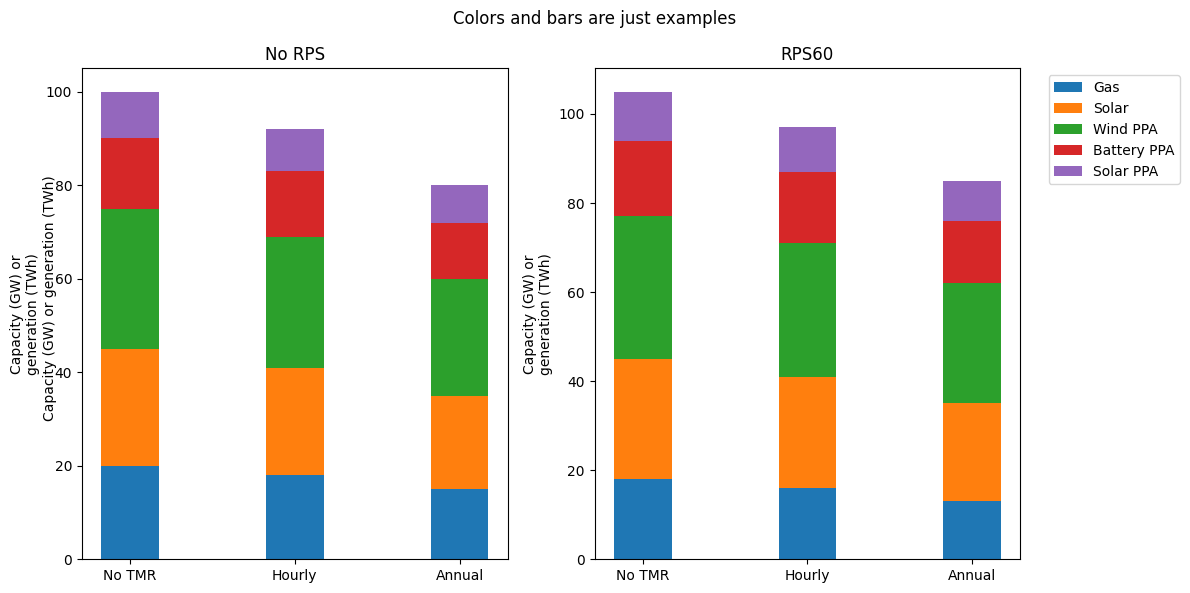

In [9]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['No TMR', 'Hourly', 'Annual']

# Using Dummy data to understand if this plot works

no_rps = {
    'Gas': [20, 18, 15],
    'Solar': [25, 23, 20],
    'Wind PPA': [30, 28, 25],
    'Battery PPA': [15, 14, 12],
    'Solar PPA': [10, 9, 8]
}

rps60 = {
    'Gas': [18, 16, 13],
    'Solar': [27, 25, 22],
    'Wind PPA': [32, 30, 27],
    'Battery PPA': [17, 16, 14],
    'Solar PPA': [11, 10, 9]
}

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
width = 0.35

# Function to create stacked bar chart
def create_stacked_bars(ax, data, title):
    bottom = np.zeros(3)
    for label, values in data.items():
        ax.bar(categories, values, width, label=label, bottom=bottom)
        bottom += values
    ax.set_title(title)
    ax.set_ylabel('Capacity (GW) or\ngeneration (TWh)')

# Create the two charts
create_stacked_bars(ax1, no_rps, 'No RPS')
create_stacked_bars(ax2, rps60, 'RPS60')

# Customize the plot
plt.suptitle('Colors and bars are just examples', fontsize=12)
fig.text(0.04, 0.5, 'Capacity (GW) or generation (TWh)', va='center', rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class EnergyPlottingLibrary:
    def __init__(self, capacity_path, generation_path, emissions_path, prices_path, h2_balance_path, tmr_prices_path, esr_prices_path):
        self.capacity_df = pd.read_csv(capacity_path)
        self.generation_df = pd.read_csv(generation_path)
        self.emissions_df = pd.read_csv(emissions_path)
        self.prices_df = pd.read_csv(prices_path)
        self.h2_balance_df = pd.read_csv(h2_balance_path)
        self.tmr_prices_df = pd.read_csv(tmr_prices_path)
        self.esr_prices_df = pd.read_csv(esr_prices_path)

    def process_capacity_data(self):
        capacity_gw_df = self.capacity_df.loc[self.capacity_df['Resource'] == 'EndCap'].copy()
        capacity_gw_df = capacity_gw_df.drop(columns=['Resource']).transpose().reset_index()
        capacity_gw_df.columns = ['Technology', 'Capacity_GW']
        capacity_gw_df['Capacity_GW'] /= 1000  # Convert MW to GW
        return capacity_gw_df

    def process_generation_data(self):
        generation_twh_df = self.generation_df.loc[self.generation_df['Resource'] == 'AnnualSum'].copy()
        generation_twh_df.drop(columns=['Resource'], inplace=True)
        generation_twh_df = generation_twh_df.transpose().reset_index()
        generation_twh_df.columns = ['Technology', 'Generation_MWh']
        generation_twh_df['Generation_TWh'] = generation_twh_df['Generation_MWh'] / 1e6  # Convert MWh to TWh
        return generation_twh_df

    def plot_capacity(self):
        capacity_data = self.process_capacity_data()
        plt.figure(figsize=(12, 6))
        plt.barh(capacity_data['Technology'], capacity_data['Capacity_GW'], color='orange')
        plt.title('Installed Capacity by Technology Group (GW)')
        plt.xlabel('Capacity (GW)')
        plt.ylabel('Technology')
        plt.tight_layout()
        plt.show()

    def plot_generation(self):
        generation_data = self.process_generation_data()
        plt.figure(figsize=(12, 6))
        plt.barh(generation_data['Technology'], generation_data['Generation_TWh'], color='blue')
        plt.title('Annual Generation by Technology Group (TWh)')
        plt.xlabel('Generation (TWh)')
        plt.ylabel('Technology')
        plt.tight_layout()
        plt.show()

    def plot_emissions(self):
        hourly_emissions = self.emissions_df[self.emissions_df['Zone'] != 'AnnualSum']
        plt.figure(figsize=(14, 6))
        plt.plot(hourly_emissions.index, hourly_emissions['Total'], label='Emissions (tonnes)', color='red')
        plt.xlabel('Time Step')
        plt.ylabel('Emissions (tonnes)')
        plt.title('Hourly Emissions')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def calculate_average_prices(self):
        average_electricity_price = self.prices_df['Zone'].mean()
        average_h2_price = self.h2_balance_df['Generation'].mean()
        average_rps_price = self.esr_prices_df['ESR_Price'].mean()
        average_tmr_price = self.tmr_prices_df['TMR_Price'].mean()
        return average_electricity_price, average_h2_price, average_rps_price, average_tmr_price

    def plot_price_comparison(self):
        avg_prices = self.calculate_average_prices()
        labels = ['Electricity', 'H2', 'RPS', 'TMR']
        plt.figure(figsize=(10, 6))
        plt.bar(labels, avg_prices, color=['blue', 'green', 'orange', 'red'])
        plt.title('Average Prices')
        plt.ylabel('Price ($)')
        plt.tight_layout()
        plt.show()

    def plot_side_by_side_bars(self, scenarios, tech_order, data_capacity, data_generation):
        """
        Plots side-by-side bars for capacity and generation by scenarios.
        """
        colors = {
            'Natural Gas': '#D8BFD8',
            'Solar': '#FFD700',
            'Solar PPA': '#FFA500',
            'Wind': '#00FF00',
            'Wind PPA': '#008000',
            'Battery Storage': '#A52A2A',
            'Battery Storage PPA': '#D2691E',
            'Other': '#C0C0C0'
        }
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
        
        bottom_capacity = np.zeros(len(scenarios))
        for tech in tech_order:
            axs[0].bar(scenarios, data_capacity[tech], bottom=bottom_capacity, color=colors[tech], label=tech)
            bottom_capacity += data_capacity[tech]

        axs[0].set_title('Installed Capacity')
        axs[0].set_ylabel('Capacity (GW)')

        bottom_generation = np.zeros(len(scenarios))
        for tech in tech_order:
            axs[1].bar(scenarios, data_generation[tech], bottom=bottom_generation, color=colors[tech], label=tech)
            bottom_generation += data_generation[tech]

        axs[1].set_title('Annual Generation')
        
        handles, labels = axs[1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', ncol=4)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    def plot_stacked_bars(self):
        """
        Plots stacked bar charts for capacity and generation based on pre-defined scenarios.
        """
        scenarios = ['0 RPS', '60 RPS']
        tech_order = ['Natural Gas', 'Solar', 'Solar PPA', 'Wind', 'Wind PPA', 'Battery Storage', 'Battery Storage PPA', 'Other']
        
        # Simulated data; replace these with actual data processing results
        capacity_data = {
            'Natural Gas': [50, 40],
            'Solar': [20, 30],
            'Solar PPA': [15, 25],
            'Wind': [30, 35],
            'Wind PPA': [25, 30],
            'Battery Storage': [10, 20],
            'Battery Storage PPA': [15, 10],
            'Other': [5, 5]
        }

        generation_data = {
            'Natural Gas': [300, 250],
            'Solar': [100, 150],
            'Solar PPA': [75, 125],
            'Wind': [150, 175],
            'Wind PPA': [125, 150],
            'Battery Storage': [50, 100],
            'Battery Storage PPA': [75, 50],
            'Other': [25, 25]
        }
        
        self.plot_side_by_side_bars(scenarios, tech_order, capacity_data, generation_data)

# Example usage
if __name__ == "__main__":
    plotting_lib = EnergyPlottingLibrary(
        capacity_path='/mnt/data/capacity.csv',
        generation_path='/mnt/data/power.csv',
        emissions_path='/mnt/data/emissions.csv',
        prices_path='/mnt/data/prices.csv',
        h2_balance_path='/mnt/data/HSC_h2_balance.csv',
        tmr_prices_path='/mnt/data/TMR_prices.csv',
        esr_prices_path='/mnt/data/ESR_prices_and_penalties.csv'
    )
    plotting_lib.plot_capacity()
    plotting_lib.plot_generation()
    plotting_lib.plot_emissions()
    plotting_lib.plot_price_comparison()
    plotting_lib.plot_stacked_bars()
